Parte 1: Preparação do Ambiente

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltim

In [28]:
# Configurando a seed para reprodutibilidade
np.random.seed(42)


In [3]:
# Gerando dados falsos
num_registros = 100 
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Brinquedos']
# Criando DataFrame
data = {
    'Data': np.random.choice(datas, num_registros),
    'Categoria': np.random.choice(categorias, num_registros),
    'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
    'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
}
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


Parte 2: Consulta e Filtragem de Dados

In [29]:
import pandas as pd

# Carregando os dados do csv criado anteriormente.
df = pd.read_csv('dados_vendas.csv')


In [30]:
# Aqui utilizei a função shape para descobrir o número de linhas e colunas
linhas, colunas = df.shape
print(f"O DataFrame possui {linhas} linhas e {colunas} colunas.")


O DataFrame possui 100 linhas e 5 colunas.


In [31]:
# Listei os tipos de dados das colunas
print(df.dtypes)


Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object


In [32]:
# Exibi as primeiras 5 linhas do DataFrame
print(df.head())


         Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0  2023-04-13  Brinquedos                  92          491.26     45195.92
1  2023-12-15  Brinquedos                  89          263.15     23420.35
2  2023-09-28  Brinquedos                  62          137.81      8544.22
3  2023-04-17   Alimentos                  97          498.16     48321.52
4  2023-03-13   Alimentos                   1          483.06       483.06


In [33]:
# Utilizei esse comando para imprimir  o número de categorias únicas e listar as categorias.
categorias_unicas = df['Categoria'].unique()
print(f"Existem {len(categorias_unicas)} categorias únicas: {categorias_unicas}.")


Existem 4 categorias únicas: ['Brinquedos' 'Alimentos' 'Eletrônicos' 'Roupas'].


In [34]:
# Esse comando seleciona apenas as linhas onde a coluna 'Categoria' é igual a 'Eletrônicos'
eletronicos = df[df['Categoria'] == 'Eletrônicos']


In [35]:
# Aqui foi calculada a média do valor total das vendas na categoria 'Eletrônicos'
media_venda_total_eletronicos = eletronicos['Valor_Total'].mean()
print(f"A média do valor total das vendas na categoria 'Eletrônicos' é de R$ {media_venda_total_eletronicos:.2f}.")


A média do valor total das vendas na categoria 'Eletrônicos' é de R$ 10544.60.


In [36]:
# Esse comando seleciona apenas as linhas onde o valor na coluna 'Valor_Total' é maior que R$ 1000. 
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
print(vendas_acima_1000)


          Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0   2023-04-13  Brinquedos                  92          491.26     45195.92
1   2023-12-15  Brinquedos                  89          263.15     23420.35
2   2023-09-28  Brinquedos                  62          137.81      8544.22
3   2023-04-17   Alimentos                  97          498.16     48321.52
5   2023-07-08   Alimentos                  27          283.56      7656.12
..         ...         ...                 ...             ...          ...
94  2023-03-06      Roupas                  94          444.44     41777.36
96  2023-11-23   Alimentos                  99          293.64     29070.36
97  2023-01-09  Brinquedos                   7          224.85      1573.95
98  2023-12-10      Roupas                  16          339.29      5428.64
99  2023-05-09   Alimentos                  90          170.79     15371.10

[87 rows x 5 columns]


In [37]:
# Verificar as linhas onde o valor na coluna 'Valor_Total' é maior que R$ 1000
qtd_vendas_acima_1000 = len(vendas_acima_1000)
print(f"Ocorreram {qtd_vendas_acima_1000} vendas acima de R$ 1000.")


Ocorreram 87 vendas acima de R$ 1000.


Parte 3: Agrupamento e Agregação

In [38]:
# Aqui foram agrupados os dados por categoria e somados os valores totais de vendas
total_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
print(total_categoria)


     Categoria  Valor_Total
0    Alimentos    530548.52
1   Brinquedos    296852.89
2  Eletrônicos    231981.13
3       Roupas    348665.18


In [41]:
# Fiz a ategoria para calular com maior valor total de vendas
categoria_max_vendas = total_categoria.loc[total_categoria['Valor_Total'].idxmax()]
print(f"A categoria com o maior valor total de vendas é '{categoria_max_vendas['Categoria']}' com R$ {categoria_max_vendas['Valor_Total']:.2f}.")


A categoria com o maior valor total de vendas é 'Alimentos' com R$ 530548.52.


In [40]:
# Agrupei os dados por categoria e calcula a média da coluna.
media_qtdade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
print(media_qtdade_categoria)


     Categoria  Quantidade_Vendida
0    Alimentos           53.117647
1   Brinquedos           50.760000
2  Eletrônicos           40.818182
3       Roupas           65.052632


Parte 4: Visualização de Dados

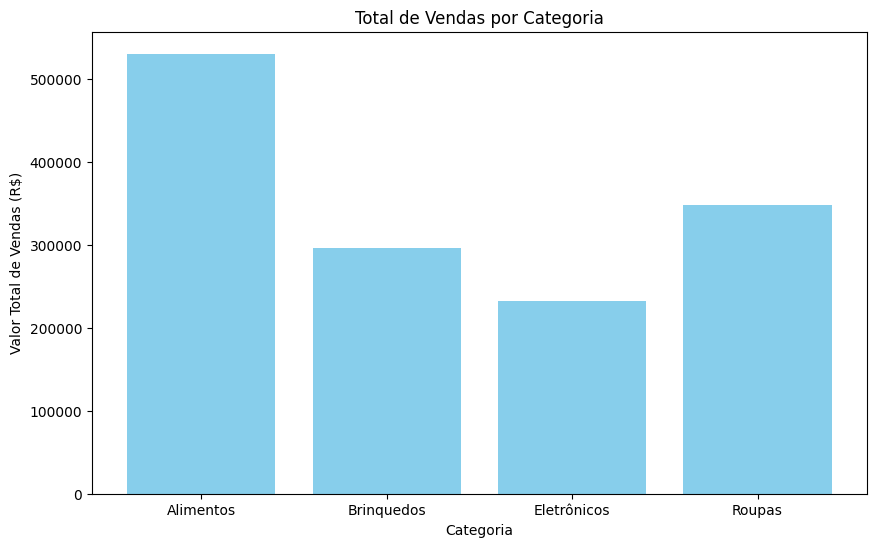

In [42]:
import matplotlib.pyplot as plt

# Criaação de um  gráfico de barras para o total de vendas por categoria
plt.figure(figsize=(10, 6))
plt.bar(total_categoria['Categoria'], total_categoria['Valor_Total'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()


Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais? Alimentos.

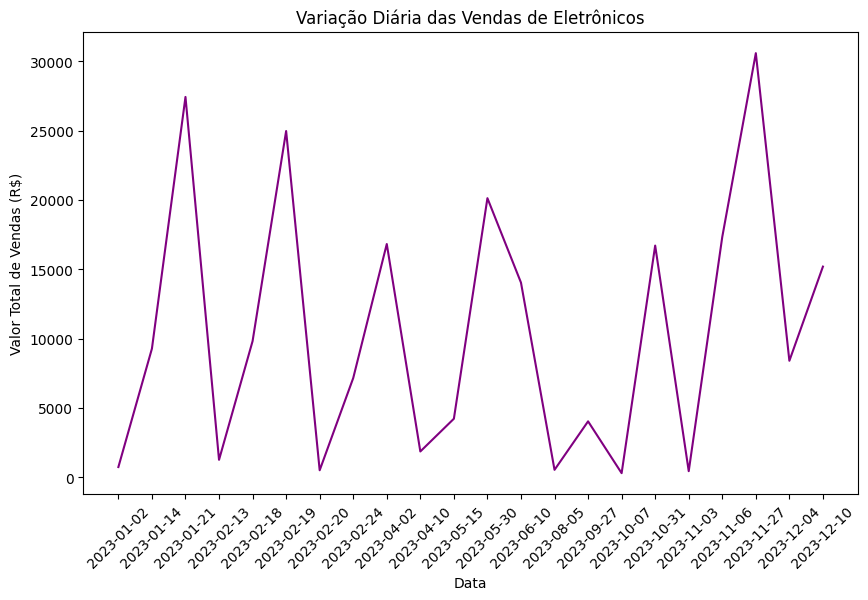

In [43]:
# Aqui foi verificada  as vendas de 'Eletrônicos' por data e somando os valores totais
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

# Criação de  um gráfico de linha para a variação diária das vendas de 'Eletrônicos'
plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()


Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?